# One-way ANOVA

The data is obtained from a study on the reductionof hospital-acquired infections by means of infection surveillance and control programs. The dataset has the following variables:<br>

**ID**&nbsp;&nbsp;&nbsp;&nbsp;Identification number<br>
**length**&nbsp;&nbsp;&nbsp;&nbsp;Average length of stay of all patients <br>
**age**&nbsp;&nbsp;&nbsp;&nbsp;Average age of all patients<br>
**risk**&nbsp;&nbsp;&nbsp;&nbsp;Risk of acquiring infection during stay (percentage)<br>
**cult**&nbsp;&nbsp;&nbsp;&nbsp;Number of routine cultures performed on patients without symptoms<br>
**xray**&nbsp;&nbsp;&nbsp;&nbsp;Number of routine x-rays performed on patients without symptoms<br>
**beds**&nbsp;&nbsp;&nbsp;&nbsp;Number of beds in hospital<br>
**meds**&nbsp;&nbsp;&nbsp;&nbsp;Medical school affiliation where 1=Yes and 2=No<br>
**reg**&nbsp;&nbsp;&nbsp;&nbsp;Region whereby 1=NE; 2=NC;3=S and 4=W<br>
**cen**&nbsp;&nbsp;&nbsp;&nbsp;Average number of patients in hospital per day<br>
**nur**&nbsp;&nbsp;&nbsp;&nbsp;Average number of nurses in hospital per day<br>
**fac**&nbsp;&nbsp;&nbsp;&nbsp;Available facilities and services at hospital (percent)<br>

**Task**: 
- Fit a linear model of infection risk against region. 
- Test if the mean infection risk is same in all the regions
- check the model conditions and assumptions 

In [1]:
# Dataset
risk.df <- read.table(file="/mnt/c/Users/Nnamdi/Desktop/Bioinformatics/Univariate_data_modelling/Exercises/DATASETS/SENIC.txt", header  = T)
head(risk.df)

,ID,length,age,risk,cult,xray,beds,meds,reg,cen,nur,fac
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60
2,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40
3,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20
4,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40
5,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40
6,6,9.76,50.9,5.1,21.9,97.0,150,2,2,147,106,40


### Linear regression model of infection risk on regions

In [2]:
risk.df$reg <- as.factor(risk.df$reg)  # convert varibale reg to factors
risk.lm <- lm(risk~reg, data=risk.df)
summary(risk.lm)


Call:
lm(formula = risk ~ reg, data = risk.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0938 -0.8270  0.0393  0.8393  3.6730 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.8607     0.2478  19.617  < 2e-16 ***
reg2         -0.4670     0.3393  -1.376  0.17155    
reg3         -0.9337     0.3284  -2.843  0.00534 ** 
reg4         -0.4795     0.4109  -1.167  0.24582    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.311 on 109 degrees of freedom
Multiple R-squared:  0.06951,	Adjusted R-squared:  0.0439 
F-statistic: 2.714 on 3 and 109 DF,  p-value: 0.04839


There are three dummy variables created for the variable "regions'; reg2,reg3 and reg4

### Use ANOVA function to test if the average infection risk is same for all the regions

In [3]:
risk.aov <- aov(risk~reg, data = risk.df)
summary(risk.aov)

             Df Sum Sq Mean Sq F value Pr(>F)  
reg           3   14.0   4.666   2.714 0.0484 *
Residuals   109  187.4   1.719                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

*Null hypothesis: average risk of infection is same in all the regions <br>
Alternative hypothesis: average risk of infection is not the same in all the regions* <br>

Since, the p-value is less than 0.05, we reject the null hypotheis hence the average risk of infection is not the same among all the regions.

### Model diagnostics

Test of normality: as seen below, the data is normally distributed


	Shapiro-Wilk normality test

data:  risk.lm$residuals
W = 0.98741, p-value = 0.3765


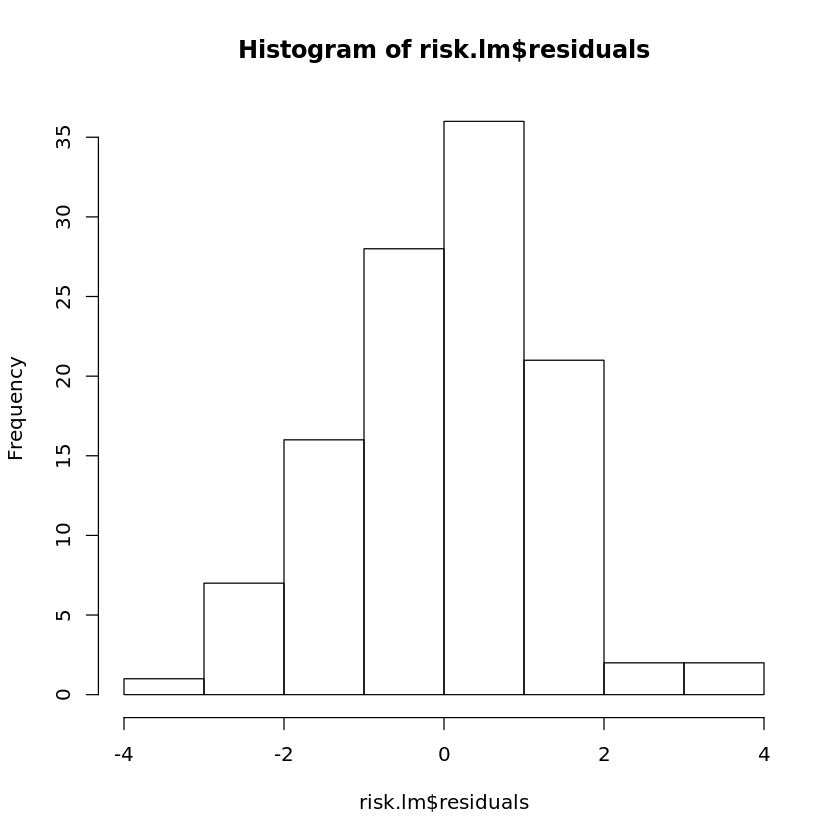

In [4]:
shapiro.test(risk.lm$residuals)
hist(risk.lm$residuals)

Check for influential observations : the cook's distance plot show that there is no influential observation

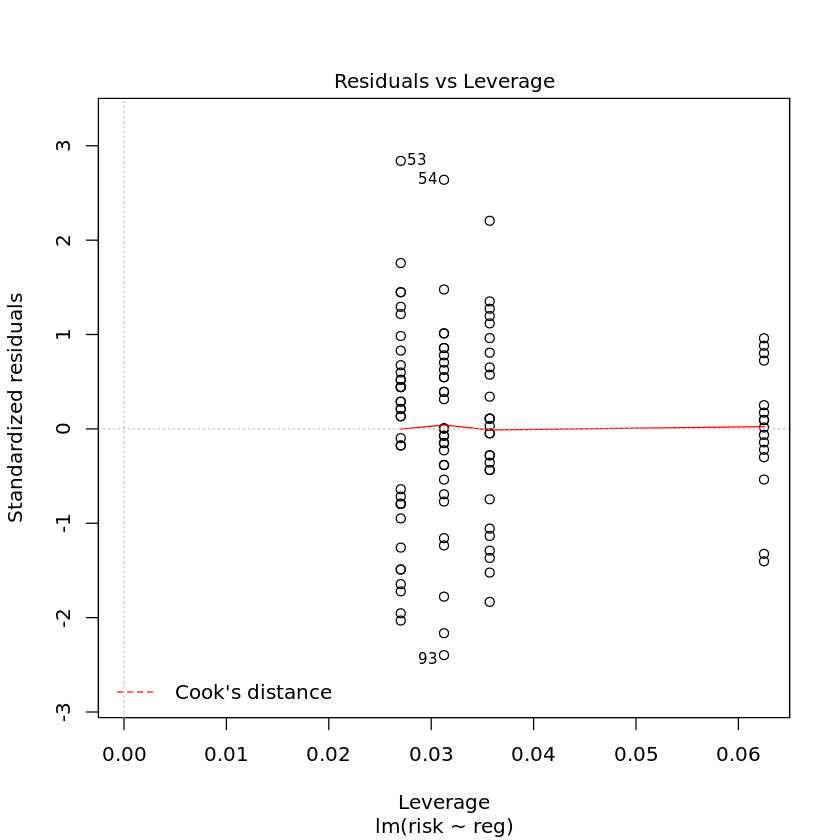

In [5]:
# Influential observations
plot(risk.lm, which = 5)

Alternatively, we can check fulfilment of the model assumptions as shown below. The plots indicate that our model obeys all the assumptions of linear regression

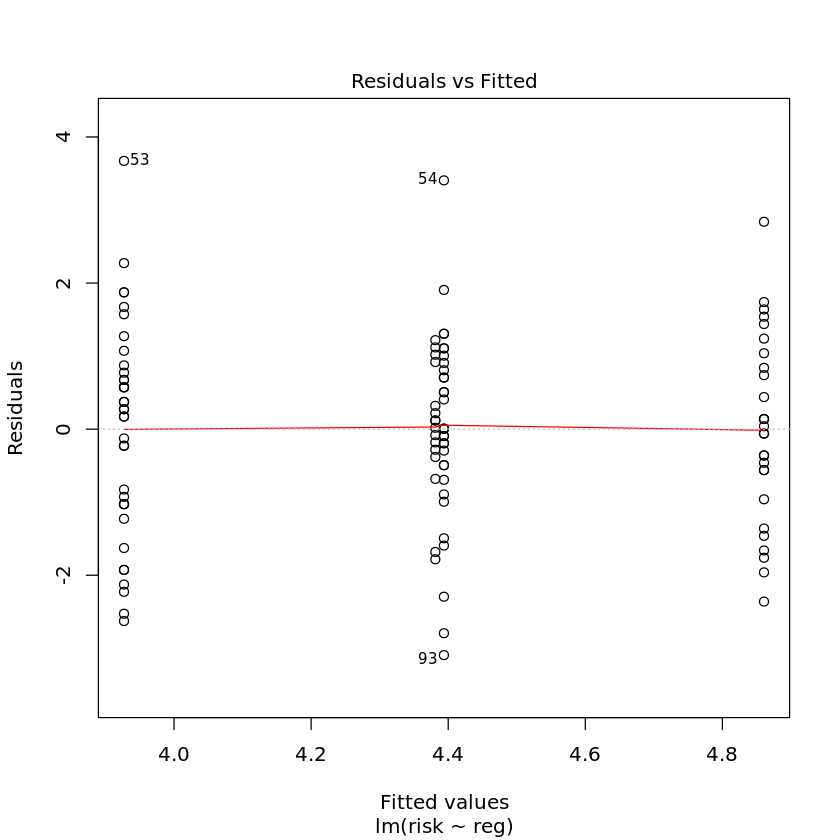

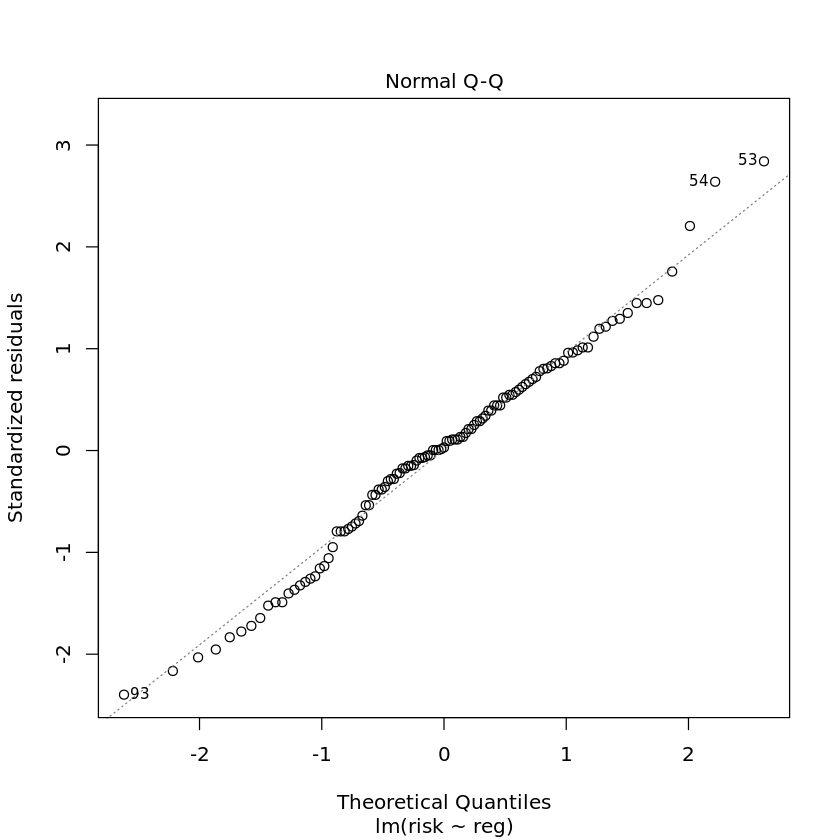

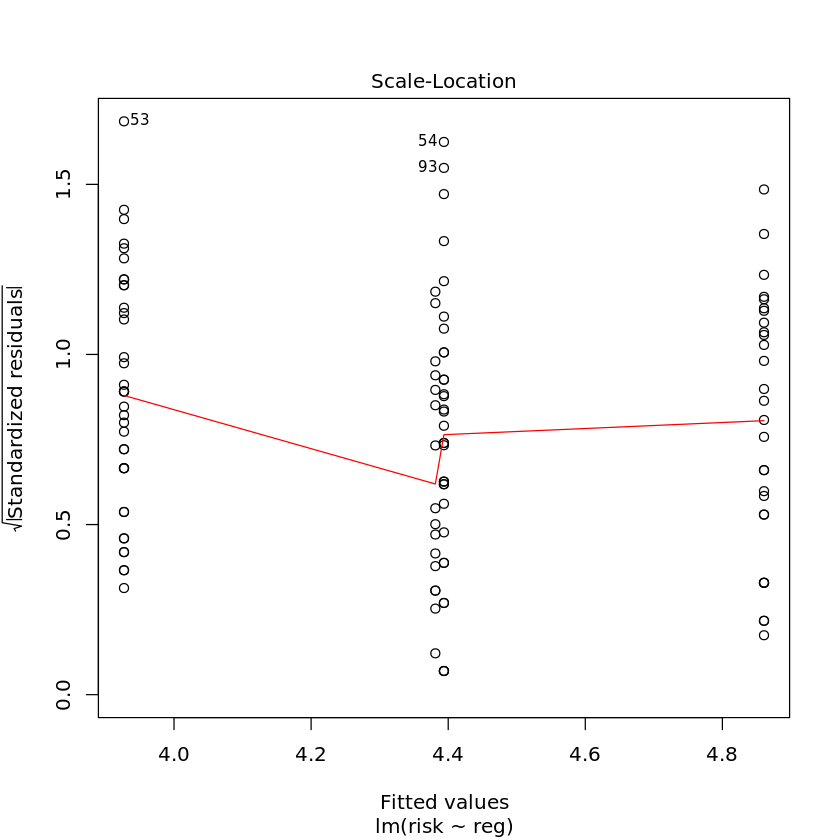

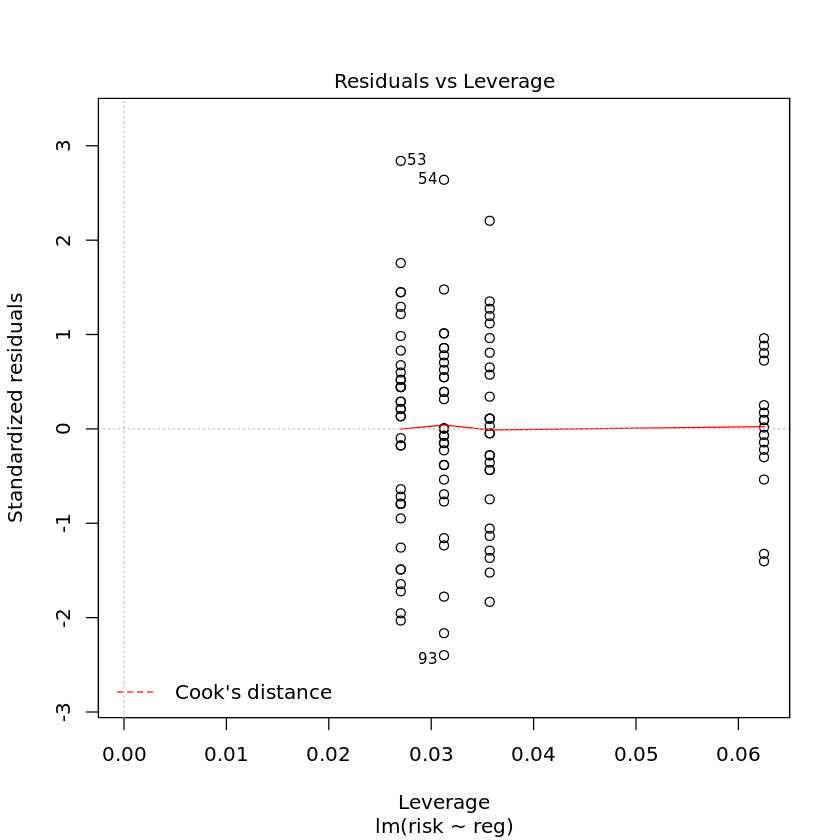

In [6]:
plot(risk.lm)